## Import Libraries & Load Dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Cifar100 Dataset

In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 875s 5us/step


c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


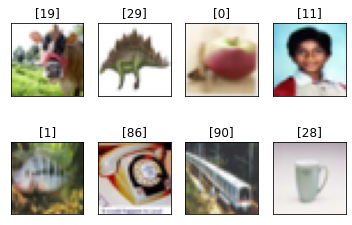

In [3]:
image_label = list(zip(X_train.reshape(-1,32,32,3),Y_train))
for index,(image,label) in enumerate(image_label[:8]):
    plt.subplot(2,4,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.title(label)

# Preprocessing

In [3]:
X_train = X_train / 255
X_test = X_test / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [4]:
X_val , X_test , Y_val , Y_test = train_test_split(X_test,Y_test,test_size=0.5)

**We have 50,000 training data and it is ready for injection into the neural network**

# Model

## MLP

In [ ]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(X_train.shape[1:])))
model_mlp.add(Dense(512,activation="relu"))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(256,activation="relu"))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(128,activation="relu"))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(100,activation="softmax"))

In [ ]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

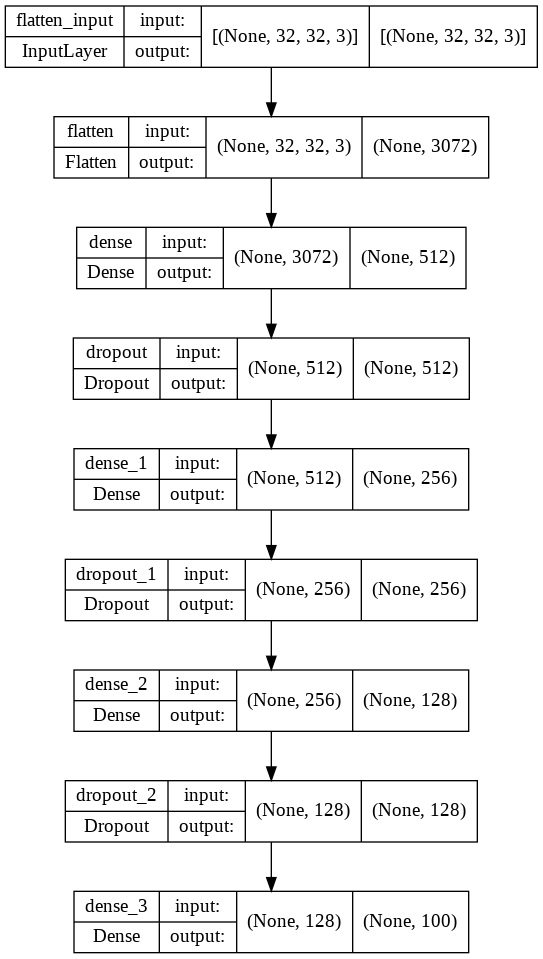

In [ ]:
plot_model(model_mlp,show_shapes=True)

In [ ]:
model_mlp.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_mlp = ModelCheckpoint("MLP_Cfar100model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [ ]:
history = model_mlp.fit(X_train,Y_train,epochs=100,validation_data=(X_val,Y_val),batch_size=300,callbacks=[checkpoint_mlp])

Epoch 1/100
167/167 [==============================] - 11s 63ms/step - loss: 4.5741 - accuracy: 0.0181 - val_loss: 4.3390 - val_accuracy: 0.0442
Epoch 2/100
167/167 [==============================] - 10s 61ms/step - loss: 4.2705 - accuracy: 0.0437 - val_loss: 4.0643 - val_accuracy: 0.0764
Epoch 3/100
167/167 [==============================] - 10s 59ms/step - loss: 4.1201 - accuracy: 0.0618 - val_loss: 3.9603 - val_accuracy: 0.0900
Epoch 4/100
167/167 [==============================] - 10s 59ms/step - loss: 4.0369 - accuracy: 0.0741 - val_loss: 3.8747 - val_accuracy: 0.1026
Epoch 5/100
167/167 [==============================] - 10s 59ms/step - loss: 3.9678 - accuracy: 0.0854 - val_loss: 3.7986 - val_accuracy: 0.1240
Epoch 6/100
167/167 [==============================] - 10s 59ms/step - loss: 3.9102 - accuracy: 0.0949 - val_loss: 3.7642 - val_accuracy: 0.1300
Epoch 7/100
167/167 [==============================] - 10s 59ms/step - loss: 3.8676 - accuracy: 0.1003 - val_loss: 3.7089 - val_ac

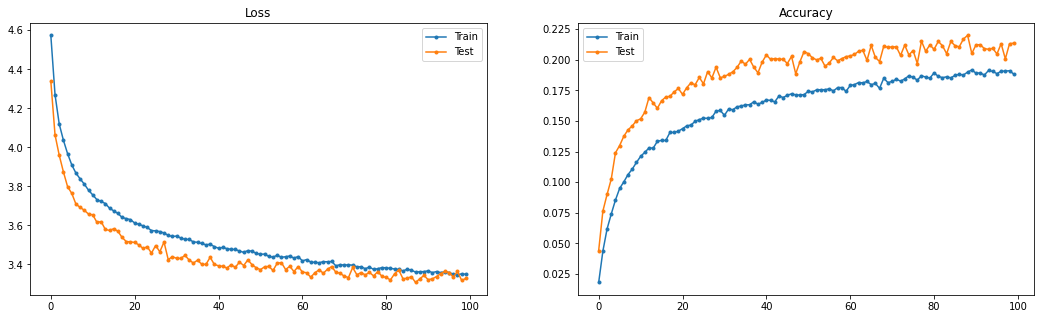

In [ ]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
model_mlp.evaluate(X_test,Y_test)

157/157 [==============================] - 1s 5ms/step - loss: 3.3046 - accuracy: 0.2138


[3.304589033126831, 0.21379999816417694]

## CNN

In [5]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(X_train.shape[1:])))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation="relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(100,activation="softmax"))

In [6]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

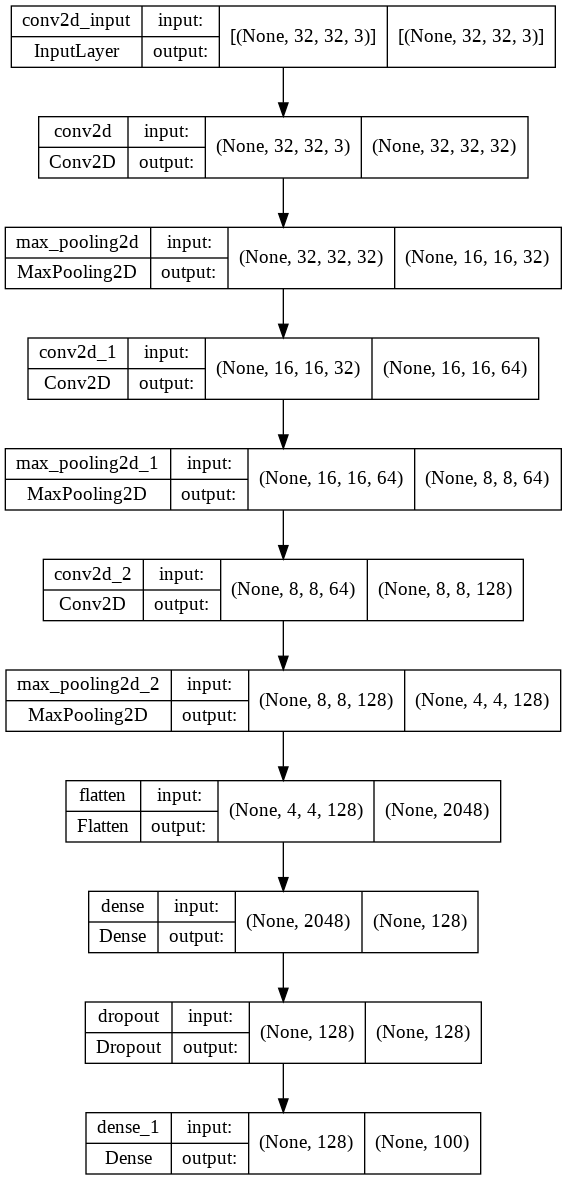

In [7]:
plot_model(model_cnn,show_shapes=True)

In [8]:
model_cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_cnn = ModelCheckpoint("CNN_Cfar100model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model_cnn.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test),callbacks=[checkpoint_cnn],batch_size=300)

Epoch 1/20
167/167 [==============================] - 106s 629ms/step - loss: 4.4079 - accuracy: 0.0318 - val_loss: 4.0223 - val_accuracy: 0.0850
Epoch 2/20
167/167 [==============================] - 104s 623ms/step - loss: 3.9632 - accuracy: 0.0855 - val_loss: 3.5782 - val_accuracy: 0.1680
Epoch 3/20
167/167 [==============================] - 105s 626ms/step - loss: 3.6722 - accuracy: 0.1295 - val_loss: 3.3112 - val_accuracy: 0.2126
Epoch 4/20
167/167 [==============================] - 105s 630ms/step - loss: 3.4862 - accuracy: 0.1606 - val_loss: 3.1679 - val_accuracy: 0.2462
Epoch 5/20
167/167 [==============================] - 105s 630ms/step - loss: 3.3569 - accuracy: 0.1870 - val_loss: 3.0466 - val_accuracy: 0.2664
Epoch 6/20
167/167 [==============================] - 105s 630ms/step - loss: 3.2448 - accuracy: 0.2029 - val_loss: 2.9447 - val_accuracy: 0.2866
Epoch 7/20
167/167 [==============================] - 105s 628ms/step - loss: 3.1656 - accuracy: 0.2175 - val_loss: 2.8642 -

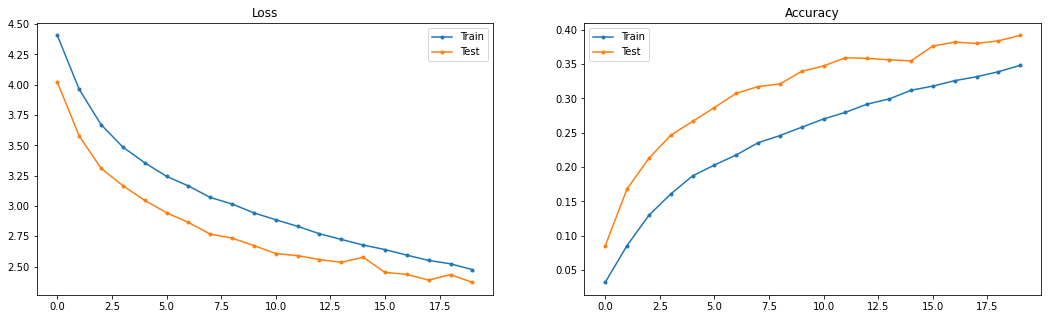

In [10]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [11]:
model_cnn.evaluate(X_test,Y_test)

157/157 [==============================] - 3s 21ms/step - loss: 2.3692 - accuracy: 0.3918


[2.3692166805267334, 0.3917999863624573]